<a href="https://colab.research.google.com/github/ltbinh97/deep-learning-in-data-science/blob/master/lesson_1/logistic_regression_with_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with MNIST dataset
- **Logistic Regression** là thuật toán hồi quy tuyến tính, đây là thuật toán **phân lớp (classification)**, tên thuật toán có regression không có nghĩa rằng đây là thuật toán **hồi quy (regression)** vì đó chỉ là tên thuật toán.
- Bộ dữ liệu **MNIST** phục vụ mục đích học các kỹ thuật và các phương pháp nhận dạng mẫu, bỏ qua thời gian phải tiền xử lý và chuẩn hóa dữ liệu (Vì thời gian xử lý dữ liệu chiếm đến gần 80% thời gian làm sản phẩm thực tế).
- **Mẫu** trong bài toán là mỗi bức ảnh, và trong bộ dữ liệu này có đến 60000 ảnh = 60000 mẫu.

## Downloading the MNIST data
- Thư viện được sử dụng ở đây là keras, thư viện đã giúp chia dữ liệu theo tỉ lệ chuẩn: dữ liệu dùng để huấn luyện chiếm 6/7 tổng dữ liệu và dữ liệu dùng để kiểm tra chiếm 1/7 tổng dữ liệu.
- Tập dữ liệu huấn luyện có kích thước (60000, 28, 28) đồng nghĩa rằng mỗi ảnh có kích thước là 28x28 và tổng tất cả là 60000 ảnh.

In [18]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [20]:
mnist.data.shape

(70000, 784)

In [ ]:
train_img, test_img, train_lb, test_lb = 

In [1]:
#matplot inline
from keras.datasets import mnist
from sklearn

# test size = 1/7 total of mnist data => training_size = 6/7 total of mnist data
(train_img, train_lb), (test_img, test_lb) = mnist.load_data()

In [2]:
train_img = train_img.reshape(60000, 784)
train_img.shape

(60000, 784)

In [3]:
train_lb.shape

(60000,)

In [4]:
test_img = test_img.reshape(10000, 784)
test_img.shape

(10000, 784)

In [5]:
test_lb.shape

(10000,)

### Showing the images and labels

In [6]:
import numpy as np
import matplotlib.pyplot as plt

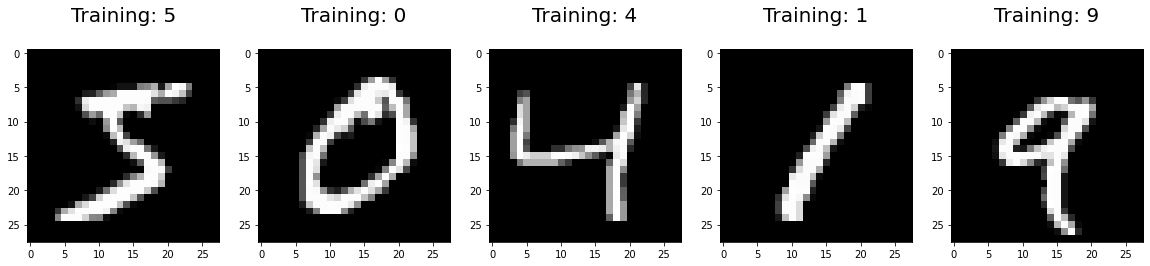

In [7]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lb[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

### Scikit-learn 4-step modeling pattern (Digits Dataset)

**Step 1.** Import model you want to use

In sklearn, all machine leaning models are implemented as Python classes

In [8]:
from sklearn.linear_model import LogisticRegression

**Step 2.** Make an instance of the Model

In [9]:
# default solver is incredibly slow that's why I change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

**Step 3.** Training the model on the data, storing the information learned from the data

Model is learning the relationship between digits and labels

In [10]:
logisticRegr.fit(train_img, train_lb)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Step 4.** Predict the labels of new data (new images)

Uses the information the model learned during the model training process

- Đầu vào của các mô hình deep learning lúc nào cũng là **vector** kể cả trong các bài toán Văn bản (Natural Language Processing), Âm thanh (Speech), Hình ảnh (Computer Vision). 
- Kích thước của mỗi vector đều phải giống nhau.
- Deep learning có mục đích giúp biểu diễn vector hiệu quả

In [11]:
# Return a numpy array
# Predict for One Observation
logisticRegr.predict(test_img[0].reshape(1,-1))

array([7], dtype=uint8)

In [12]:
# Predict multiple observations (images) at once
logisticRegr.predict(test_img[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

In [13]:
# Make predictions for the entire test data
predictions = logisticRegr.predict(test_img)

### Measuring Model Performance

While there are other ways of measuring model performance, we are going to keep this simple and use accuracy as our metric. To do this, we are going to see how the model performs on the new data (test data)

- accuracy is defined as: fraction of correct predictions = correct predictions / total number of data points


In [14]:
score = logisticRegr.score(test_img, test_lb)
score

0.9255

### Display misclassified images with predicted labels

In [15]:
misclassifiedIndexes = []
for index, (label, predict) in enumerate(zip(test_lb, predictions)):
    if label != predict:
        misclassifiedIndexes.append(index)

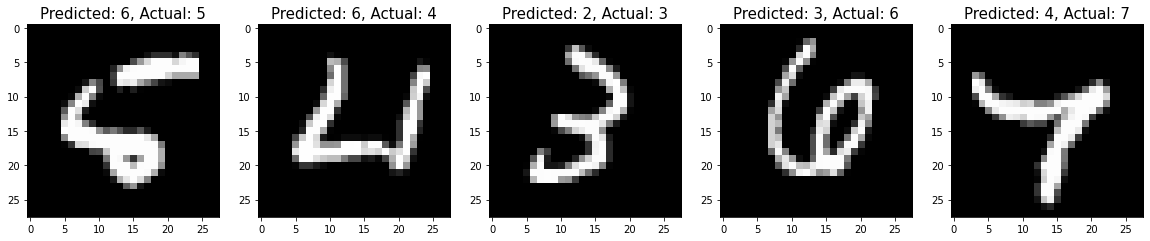

In [16]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lb[badIndex]), fontsize=15)